# Pergunta 1 e 2

<BarContainer object of 13 artists>

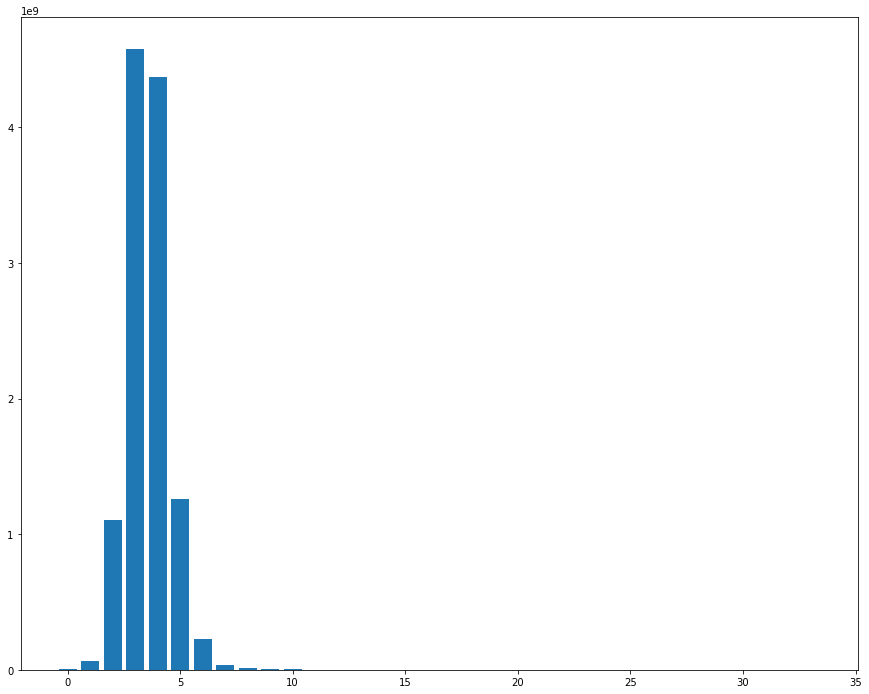

In [35]:
import pandas as pd 
from matplotlib import pyplot as plt

dataAula3 = pd.read_csv( 'C:/Users/PICHAU/Desktop/AnaliseDeDados/DataAnalysis/datasets/kc_house_data.csv' )

dataAula3['dormitory_type'] = 'standard'

dataAula3.loc[dataAula3['bedrooms']==1,'dormitory_type'] = 'studio'
dataAula3.loc[dataAula3['bedrooms']==2,'dormitory_type'] = 'apartament'
dataAula3.loc[dataAula3['bedrooms']>2,'dormitory_type'] = 'house'

priceByBedrooms = dataAula3[['price','bedrooms']].groupby( 'bedrooms' ).sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.figure( figsize=(15, 12) )
plt.bar( priceByBedrooms['bedrooms'], priceByBedrooms['price'] )

# Pergunta 3

<BarContainer object of 2 artists>

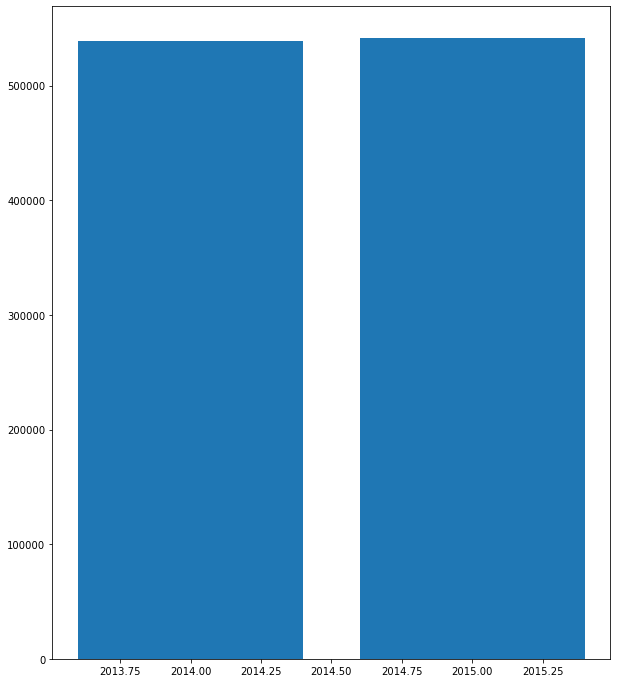

In [29]:
dataAula3['year'] = pd.to_datetime(dataAula3['date']).dt.year

by_year = dataAula3[['price','year']].groupby( 'year' ).mean().reset_index()

plt.figure( figsize=(10,12) )
plt.bar( by_year['year'], by_year['price'] )


# Pergunta 4

<BarContainer object of 4 artists>

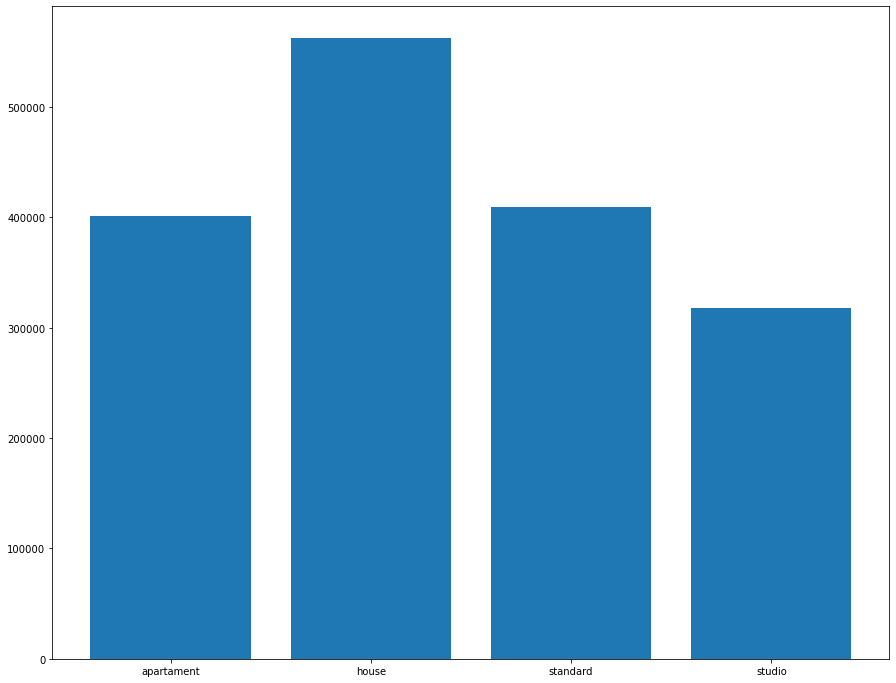

In [40]:

by_dormitory_type = dataAula3[['price','dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()

plt.figure( figsize=(15,12) )
plt.bar( by_dormitory_type['dormitory_type'], by_dormitory_type['price'] )


# Pergunta 5

<BarContainer object of 69 artists>

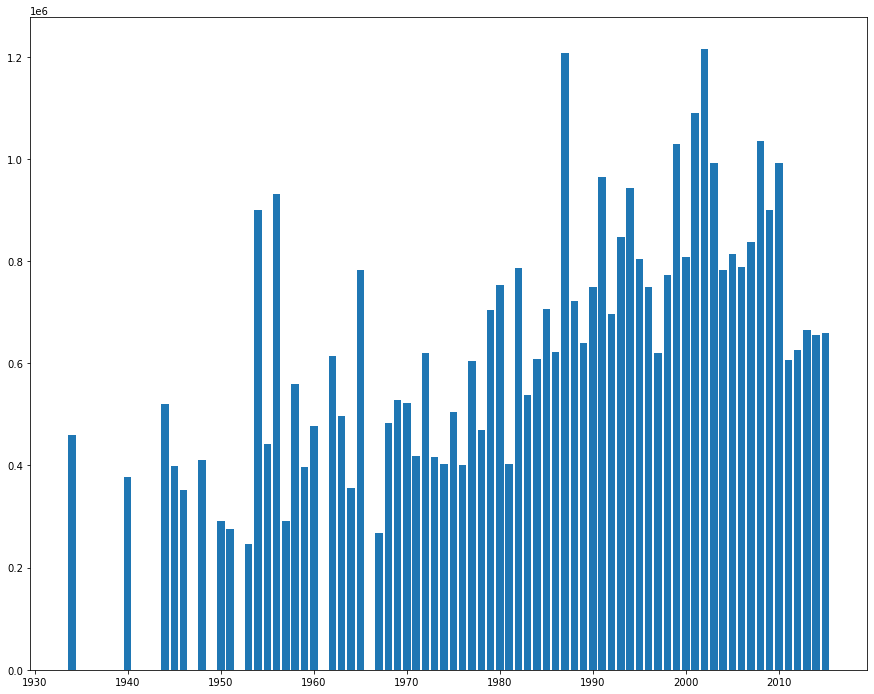

In [51]:
from numpy import int64
dataAula3['price'] = dataAula3['price'].astype( int64 )
by_renovated_year = dataAula3[dataAula3['yr_renovated']>1930][['price','yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()


plt.figure( figsize=(15,12) )
plt.bar( by_renovated_year['yr_renovated'], by_renovated_year['price'] )


# Pergunta 6

In [55]:
dataAula3.dtypes
by_yr_built_and_dorm_type = dataAula3[['price','yr_built','dormitory_type']].groupby( ['yr_built','dormitory_type'] ).mean()

print(by_yr_built_and_dorm_type)

                            price
yr_built dormitory_type          
1900     apartament     589533.33
         house          584854.27
         studio         398944.00
1901     apartament     452856.40
         house          578619.17
...                           ...
2014     house          692687.72
         studio         516500.00
2015     apartament     543250.00
         house          797383.06
         studio         385195.00

[314 rows x 1 columns]
